<a href="https://colab.research.google.com/github/parthbagda211/project-1/blob/main/BigMart%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#libraries

In [1]:
import pandas as pd #Used to lead the dataset
import numpy as np #Used to do operations with arrays and matrices
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization
import warnings #Avoid unnecessary information shown by the model 
%matplotlib inline
warnings.filterwarnings('ignore') 

# Loding the Dateset

In [2]:
df = pd.read_csv('/content/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Preprocessing

In [3]:
#statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
#Datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Check Unique values in the dataset**

df.nunique() Or we could have used the lambda function df.apply(lambda x:len(x.nunique()))

In [5]:
df.nunique()


Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**Preprocessing**

In [6]:
#Check for Null values 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
 #Check for categorical attributes 
 cat_col = []
 for x in df.dtypes.index:
   if df.dtypes[x] == 'object':
     cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
#From this categorical columns, I don't need Item Identifier and outlet Identifier
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')

In [10]:
#Print the categorical columns 
for col in cat_col:
  print(col)
  print(df[col].value_counts())
  print()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

**Filling the missing values:**

Item_Weight and Outlet_Size have missing values. We can either replace the missing values with the overall mean or we can replace it by the mean based on the Item_Identifier I am Using the Groupby() function of pandas I could have used the pivot_table as:


Item_weight_mean = df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')

In [11]:

item_weight_mean = df.groupby('Item_Identifier').Item_Weight.mean()
item_weight_mean = pd.DataFrame(item_weight_mean)
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
miss_bool = df['Item_Weight'].isnull()

In [13]:
df.loc[1]['Item_Weight']

5.92

In [14]:
for i,item in enumerate(df['Item_Identifier']):
  if miss_bool[i]:
    if item in item_weight_mean:
      df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
    else:
      df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [15]:
df['Item_Weight'].isnull().sum()

0

*The other attribute which have missing values is the Outlet_Size which is a categorical variable. We can either replace the missing values with the most frequent Outlet_size or we can replace it by the mode based on Outlet_Type as we did for the Item_Weight.*

In [16]:
outlet_size_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
miss_bool = df['Outlet_Size'].isnull()
     

df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
     

df['Outlet_Size'].isnull().sum()

0

*Now, Item_Visibility has some values as 0, so, I will replace those zeroes with the mean of the Item_Visibility column*

In [18]:
sum(df['Item_Visibility'] == 0)

526

In [19]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()], inplace = True)

In [20]:
sum(df['Item_Visibility'] == 0)

0

*The dataset has a column named "Item_Fat_content" which have only two relevant values i.e "Low Fat and Regular", LF, lowfat and Low Fat are same.*

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat': 'Low Fat'})

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Creation of New Attributes**

In Item_Identifier I can extract a new category, NC: Non consumable, FD: Food, DR: Drinks, so we will create a new feature, New_Item_Type

In [23]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
     

df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [24]:

df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

*We have a Non-Consumable products, but in the Item_Fat_Content, we only have Low Fat and Regular, The Non-Consumable products should be assigned as Non-Edible*

In [25]:
df.loc[df['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
     

df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

**Creating small values for Outlet_Establishment_Year**

In the Outlet_Establishment_Year we have the values as 1999, 2000, etc. If we directly use these as the input it will decrease the performance of our model as the values are high. So, I will create some small numbers. But how? I can use log transformation or normalisation, but I will create a new attribute. This data is collected at 2013, So, I will substract the values with 2013. eg. for I will replace 2009 by 2013-2009 = 4

In [26]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
     

df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [27]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Exploratory Data Analysis
**For Numerical Attributes**

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

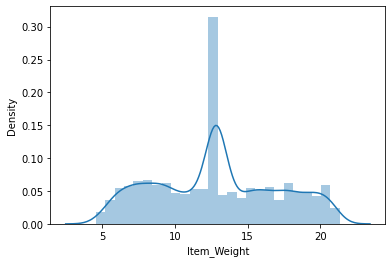

In [28]:
#Distplot is for numerical values
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

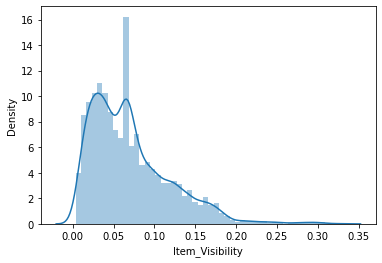

In [29]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

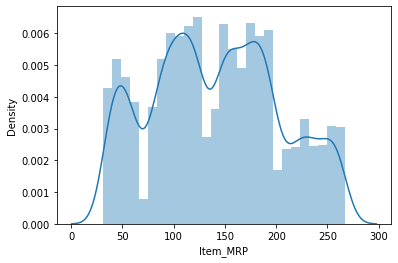

In [30]:
sns.distplot(df['Item_MRP'])

*Here, we see that the Item_MRP ranges from different categories, we can make a new category from this, like Costly, cheap. This might give us a performance boost.*

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

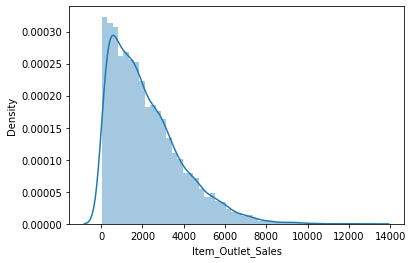

In [31]:
sns.distplot(df['Item_Outlet_Sales'])


**Log Transformation**

Here, we see that the values for the sales are too high, so I will normalize it. I am using log transformation. I have added 1 inside the log(), to avoid the infinite values (Log(0) = infinite). After Log transformation, we can see that it is nearly normal distribution.

In [32]:
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])
     

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

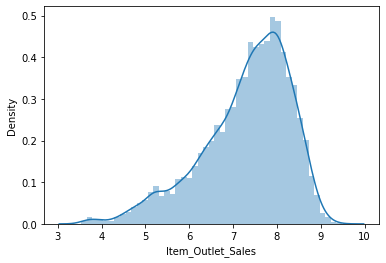

In [33]:
sns.distplot(df['Item_Outlet_Sales'])

**For Categorical Attributes**

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

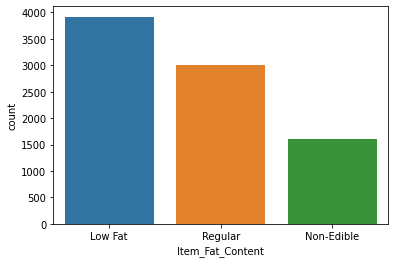

In [34]:
sns.countplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

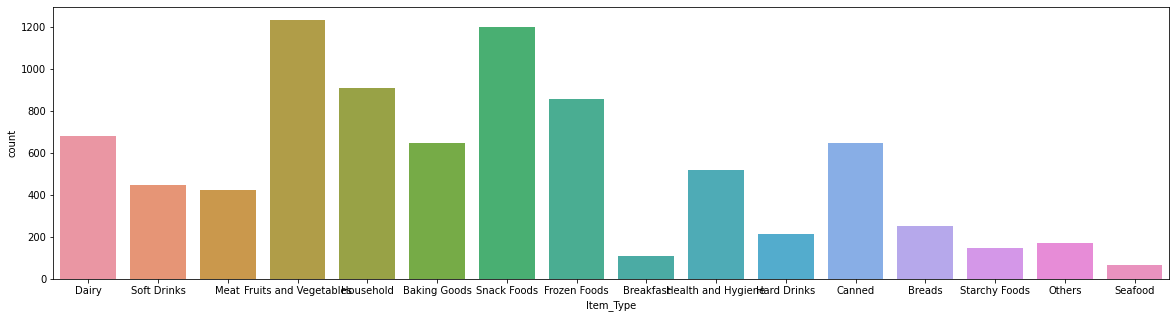

In [39]:
plt.figure(figsize = (20,5))
sns.countplot(df['Item_Type'])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

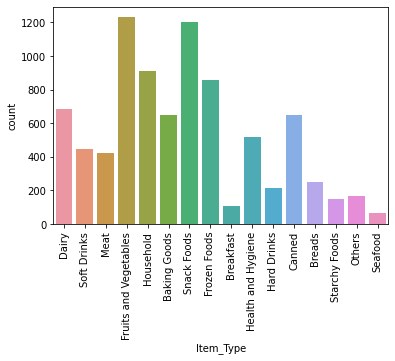

In [40]:
l = list(df['Item_Type'].unique())
chart = sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels = l, rotation = 90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

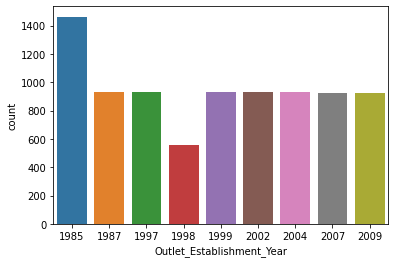

In [41]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

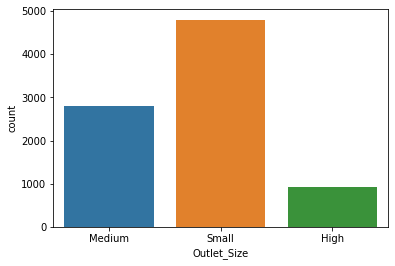

In [42]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

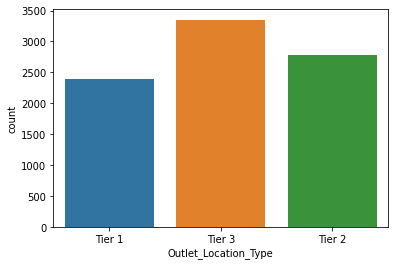

In [43]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

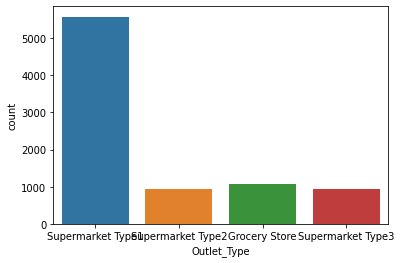

In [44]:
sns.countplot(df['Outlet_Type'])
     

# Correlation Matrix

**Pandas has a correlation function to find the correlation matrix for a dataframe**

<AxesSubplot:>

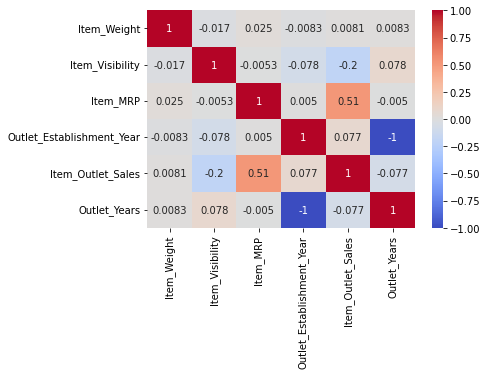

In [45]:
corr = df.corr() 
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

# Label Encoding

In [46]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

In [47]:
cat_col = ['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type', 'Outlet_Type','New_Item_Type']
for col in cat_col:
  df[col] = le.fit_transform(df[col])
  

In [48]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,8.225808,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,2009,1,2,2,6.096776,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,7.648868,1,14,9
3,FDX07,19.20,2,0.066132,6,182.0950,OUT010,1998,2,2,0,6.597664,1,15,0
4,NCD19,8.93,1,0.066132,9,53.8614,OUT013,1987,0,2,1,6.903451,2,26,1


# One Hot Encoding

In [49]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type', 'Outlet_Type','New_Item_Type'])

#Input Split

In [50]:
X = df.drop(columns =[ 'Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

# Model Training

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X,y):
  #train the model
  model.fit(X,y)
  #predict the training dataset
  pred = model.predict(X)
  #perform cross validation
  cv_score = cross_val_score(model,X,y,scoring = 'neg_mean_squared_error', cv = 5)
  cv_score = np.abs(np.mean(cv_score))
  print("Model Report")
  print("MSE:", mean_squared_error(y,pred))
  print("cv_score: ",cv_score)


# Linear Regression

Model Report
MSE: 0.28800650325017957
cv_score:  0.2891182742641595


<AxesSubplot:title={'center':'Model Coefficient'}>

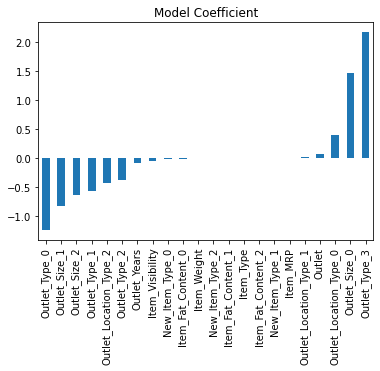

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model,X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficient')

# Ridge Regression

Model Report
MSE: 0.2881919345594855
cv_score:  0.28930042565084746


<AxesSubplot:title={'center':'Model Coefficient'}>

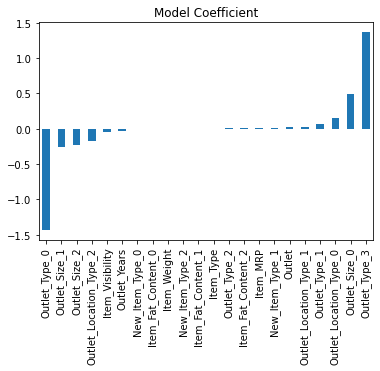

In [55]:

model = Ridge()
train(model,X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficient')

# Lasso Regression

Model Report
MSE: 0.7628688679102087
cv_score:  0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficient'}>

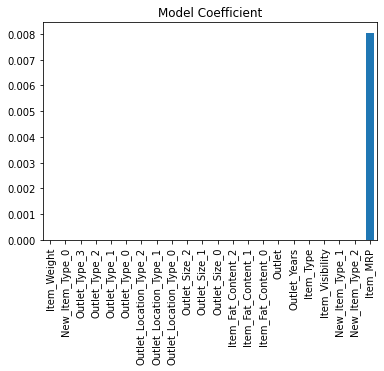

In [57]:
model = Lasso()
train(model,X,y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficient')

# Decision Tree Regressor

Model Report
MSE: 5.5534030638578795e-34
cv_score:  0.5789340391438227


<AxesSubplot:title={'center':'Feature Importance'}>

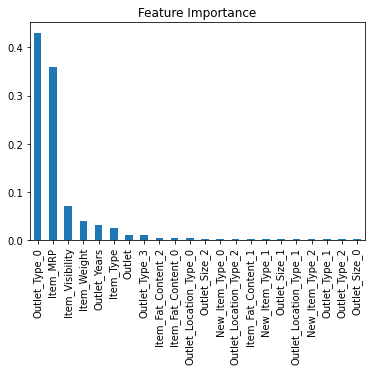

In [58]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importance')

# Random Forest Regressor

Model Report
MSE: 0.042365868528188924
cv_score:  0.3098628642355471


<AxesSubplot:title={'center':'Feature Importance'}>

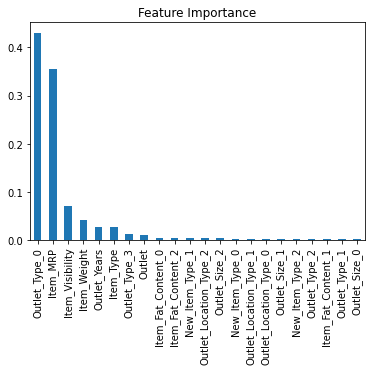

In [59]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importance')
     


# Extra Trees Regressor

Model Report
MSE: 1.0418489584965893e-28
cv_score:  0.3322006589124385


<AxesSubplot:title={'center':'Feature Importance'}>

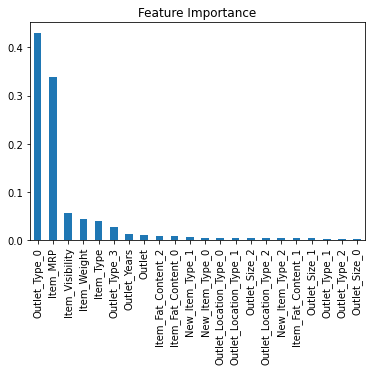

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Feature Importance')